In [1]:
import gym
import numpy as np
import pandas
import matplotlib.pyplot as plt
import gym_map_bro
import toy_agents

env = gym.make('map-bro-v0')
env.__myinit__()

np.random.seed(0)

# Variable initialization for manual looping
loop = 0

# Variables for keeping track of total values over time
vals = np.array([0,0])
t = 0

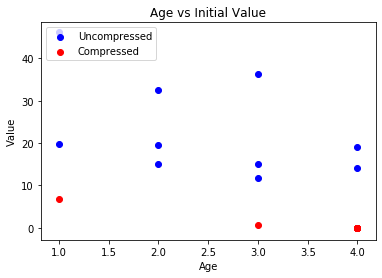

Uncompressed Database:
                  uid              src  sport              dst  age      value
0   CTySHd36MODzjqHEh   192.168.202.76    137  192.168.202.255  1.0  19.888774
1  C4SrUv2XNVcWGxMKA4  192.168.202.100  45658   192.168.27.202  4.0  19.142368
2   CTySHd36MODzjqHEh   192.168.202.76    137  192.168.202.255  4.0  14.071379
3   CTySHd36MODzjqHEh   192.168.202.76    137  192.168.202.255  1.0  46.177457
4   CTySHd36MODzjqHEh   192.168.202.76    137  192.168.202.255  2.0  15.046874
5  C4SrUv2XNVcWGxMKA4  192.168.202.100  45658   192.168.27.202  3.0  11.768116
6   CTySHd36MODzjqHEh   192.168.202.76    137  192.168.202.255  3.0  36.340959
7   CTySHd36MODzjqHEh   192.168.202.76    137  192.168.202.255  2.0  32.496529
8   CTySHd36MODzjqHEh   192.168.202.76    137  192.168.202.255  3.0  15.100767
9   CghXHv4P9sybq1dnL  192.168.202.100  45658   192.168.27.203  2.0  19.486577
Compressed Database:
                 uid              src  sport              dst  age     value
0  CghXHv4

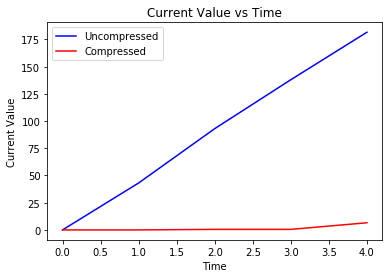

In [5]:
# This cell can be run repeatedly to import new batches from a bro file

# New batch of 5 lines, here represented by 5 random values
batch = pandas.read_csv("dns.log", header=loop)
values = np.random.exponential([10.0, 10.0, 10.0, 10.0, 10.0])
loop += 5

toy_agents.batch_load(env, batch, values)

vals = np.vstack((vals, np.array([np.sum(env.values0_init[:,1]),np.sum(env.values1_init[:,1])])))
t += 1

env.render()

sub = plt.subplot()
sub.plot(np.arange(t+1),vals[:,0], c = 'b', label = 'Uncompressed')
sub.plot(np.arange(t+1),vals[:,1], c = 'r', label = 'Compressed')
sub.set_title('Current Value vs Time')
sub.set_xlabel('Time')
sub.set_ylabel('Current Value')
sub.legend(loc=2)
